<a href="https://colab.research.google.com/github/petroniocandido/STPE/blob/main/S%C3%A9ries_Temporais_e_Processos_Estoc%C3%A1sticos_Cadeias_de_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cadeias de Markov
**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Simulando Cadeias de Markov

In [ ]:
def P_cumulativa(pi):
  pif = [pi[0]]
  for i in range(1, len(pi)):
    pif.append( pif[-1] + pi[i])
  return pif

def escolhe_estado(S, fpi):
  r = np.random.rand(1)[0]
  for i in range(len(S)):
    if fpi[i] >= r:
      return S[i]

def simular_cadeia_markov(S, pi, P, n, m):
  processo = np.zeros((m,n))
  for j in range(m):
    pi_t = pi
    pif = P_cumulativa(pi_t)
    processo[j, 0] = escolhe_estado(S, pif)
    for i in range(1, n):
      p = P[ int(processo[j, i - 1]) , : ]
      pf = P_cumulativa(p)
      processo[j, i] = escolhe_estado(S, pf)
  return processo

#### Processo de Bernoulli com Cadeias de Markov

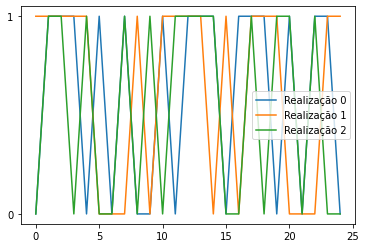

In [ ]:
m = 3
n = 25

S = (0, 1)
p = 0.5

pi = np.array([1 - p, p])

P = np.array([
              [1 - p, p],
              [1 - p, p]
              ])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.yticks(S)
plt.legend()


In [ ]:
pi.dot(P)

array([0.5, 0.5])

### Jogo de Dados com Cadeias de Markov

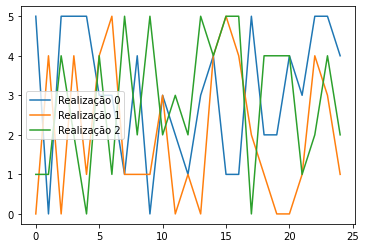

In [ ]:
m = 3
n = 25

S = [i for i in range(0,6)]

pi = np.array([1/6 for i in range(6)])

P = np.array([[1/6 for i in range(6)] for i in range(6)])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.yticks(S)
plt.legend()

In [ ]:
pi.dot(P)

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

### Clima

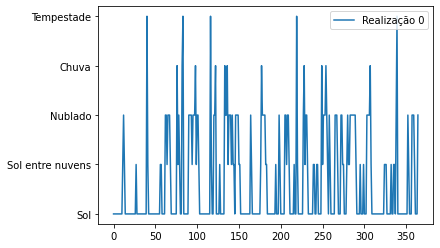

In [ ]:
m = 1

n = 365

estados = ["Sol", "Sol entre nuvens", "Nublado", "Chuva", "Tempestade"]

S = [i for i in range(5)]

pi = np.array([1, 0, 0, 0, 0])

P = np.array([
              [.8, .1, .07, .02, .01],
              [.5, .3, .15, .04, .01], 
              [.1, .3, .4, .15, .05],
              [.1, .45, .3, .1, .05],
              [.1, .3, .45, .1, .05]
              ])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.yticks(ticks=S, labels=estados)
plt.legend()

In [ ]:
p = pi.dot(P)
p.dot(P)

array([0.7   , 0.143 , 0.1095, 0.0335, 0.014 ])

### Passeio Aleatório com Cadeias de Markov - Versão 1

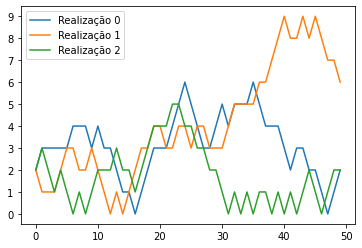

In [ ]:
def prob(i,j,ns):
  if (i == 0 and j == 1) or (i == ns -1 and j == ns -2):
    return 1
  elif  0 < i < (ns - 1):
    if j in (i-1, i+1):
      return 0.3
    elif j == i:
      return 0.4
  return 0

ns = 10

m = 3
n = 50

S = [i for i in range(ns)]
pi = np.zeros(ns)
pi[np.random.randint(0,ns)] = 1

P = np.array([[prob(i,j,ns) for j in range(ns)] for i in range(ns)])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.yticks(S)
plt.legend()

In [ ]:
P

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.3, 0.4, 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.3, 0.4, 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.3, 0.4, 0.3, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.3, 0.4, 0.3, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.3, 0.4, 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.3, 0.4, 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0.4, 0.3, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0.4, 0.3],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

### Passeio Aleatório com Cadeias de Markov - Versão 2

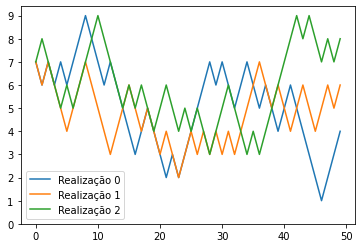

In [ ]:
def prob(i,j,ns):
  if (i == 0 and j == 1) or (i == ns -1 and j == ns -2):
    return 1
  elif  0 < i < (ns - 1) and j in (i-1, i+1):
    return 0.5
  return 0

ns = 10
m = 3
n = 50
S = [i for i in range(ns)]
pi = np.zeros(ns)
pi[np.random.randint(0,ns)] = 1

P = np.array([[prob(i,j,ns) for j in range(ns)] for i in range(ns)])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.yticks(S)
plt.legend()  

In [ ]:
P

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

## Convergência para uma Distribuição Estacionária

In [ ]:
def mat_pot(mat, n):
  return np.linalg.matrix_power(mat, n)

def e_regular(mat, n):
  return np.all(mat_pot(mat,n) > 0)

In [ ]:
def transicao(pi, P, n):
  return pi.dot(mat_pot(P, n))

In [ ]:
def simular_convergencia(S, pi, P, n, nomes=None):
  pit = pi
  ns = pi.shape[0]
  pis = np.zeros((n,ns))
  for i in range(n):
    pit = pit.dot(P)
    pis[i,:] = pit
  for i in range(ns):
    plt.plot(pis[:,i], label="{}".format(i if nomes is None else nomes[i]))
  plt.legend()
  plt.tight_layout()

In [ ]:
def dist_estacionaria(S, P):
  m = len(S)
  A = np.append(P.T - np.identity(m), np.ones((1,m)),axis=0)
  b = np.zeros(m+1)
  b[-1] = 1
  b = b.T
  return np.linalg.solve(A.T.dot(A), A.T.dot(b))

### Simulação 1

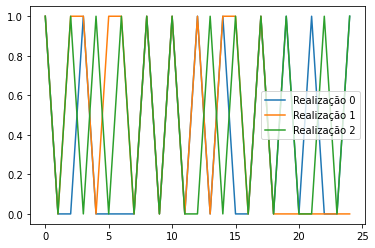

In [ ]:
m = 3
n = 25
S = (0,1)
p = 0.8
pi = np.array([1 - p, p])
P = np.array([
              [1 - p, p],
              [p, 1 - p]
              ])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.legend()


In [ ]:
mat_pot(P, 3)

array([[0.532, 0.468],
       [0.468, 0.532]])

In [ ]:
e_regular(P, 10)

True

In [ ]:
transicao(pi, P, 200)

array([0.5, 0.5])

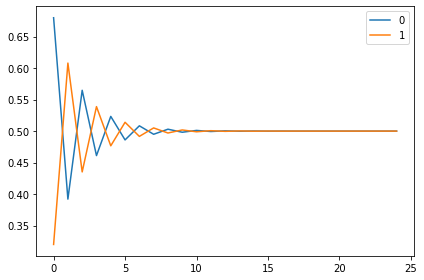

In [ ]:
simular_convergencia(S, pi, P, n)

### Clima

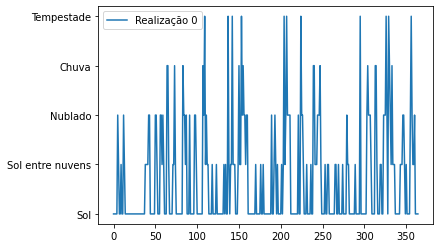

In [ ]:
m = 1
n = 365
estados = ["Sol", "Sol entre nuvens", "Nublado", "Chuva", "Tempestade"]
S = [i for i in range(5)]
pi = np.array([1, 0, 0, 0, 0])
P = np.array([
              [.8, .1, .07, .02, .01],
              [.5, .3, .15, .04, .01], 
              [.1, .3, .4, .15, .05],
              [.1, .45, .3, .1, .05],
              [.1, .3, .45, .1, .05]
              ])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.yticks(ticks=S, labels=estados)
plt.legend()

In [ ]:
mat_pot(P, 50)

array([[0.58674734, 0.1900605 , 0.15486465, 0.04939982, 0.01892769],
       [0.58674734, 0.1900605 , 0.15486465, 0.04939982, 0.01892769],
       [0.58674734, 0.1900605 , 0.15486465, 0.04939982, 0.01892769],
       [0.58674734, 0.1900605 , 0.15486465, 0.04939982, 0.01892769],
       [0.58674734, 0.1900605 , 0.15486465, 0.04939982, 0.01892769]])

In [ ]:
transicao(pi, P, 150)

array([0.58674734, 0.1900605 , 0.15486465, 0.04939982, 0.01892769])

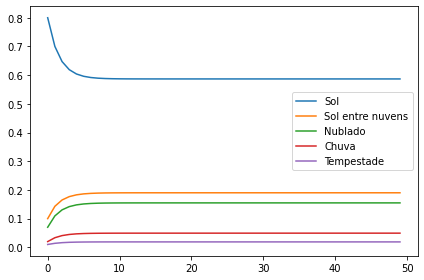

In [ ]:
simular_convergencia(S, pi, P, 50, nomes=estados)

In [ ]:
dist_estacionaria(S, P)

array([0.58674734, 0.1900605 , 0.15486465, 0.04939982, 0.01892769])

### Passeio Aleatório 1

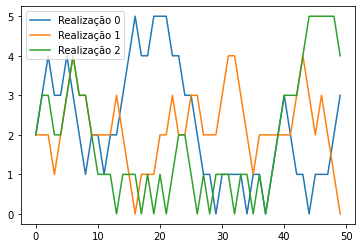

In [ ]:
def prob(i,j,ns):
  if (i == 0 and j == 1) or (i == ns -1 and j == ns -2):
    return 1
  elif  0 < i < (ns - 1):
    if j in (i-1, i+1):
      return 0.3
    elif j == i:
      return 0.4
  return 0

ns = 10
m = 3
n = 50
S = [i for i in range(ns)]
pi = np.zeros(ns)
pi[np.random.randint(0,ns)] = 1

P = np.array([[prob(i,j,ns) for j in range(ns)] for i in range(ns)])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.legend()

In [ ]:
P

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.3, 0.4, 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.3, 0.4, 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.3, 0.4, 0.3, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.3, 0.4, 0.3, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.3, 0.4, 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.3, 0.4, 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0.4, 0.3, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0.4, 0.3],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

In [ ]:
mat_pot(P, 10000)

array([[0.03488372, 0.11627907, 0.11627907, 0.11627907, 0.11627907,
        0.11627907, 0.11627907, 0.11627907, 0.11627907, 0.03488372],
       [0.03488372, 0.11627907, 0.11627907, 0.11627907, 0.11627907,
        0.11627907, 0.11627907, 0.11627907, 0.11627907, 0.03488372],
       [0.03488372, 0.11627907, 0.11627907, 0.11627907, 0.11627907,
        0.11627907, 0.11627907, 0.11627907, 0.11627907, 0.03488372],
       [0.03488372, 0.11627907, 0.11627907, 0.11627907, 0.11627907,
        0.11627907, 0.11627907, 0.11627907, 0.11627907, 0.03488372],
       [0.03488372, 0.11627907, 0.11627907, 0.11627907, 0.11627907,
        0.11627907, 0.11627907, 0.11627907, 0.11627907, 0.03488372],
       [0.03488372, 0.11627907, 0.11627907, 0.11627907, 0.11627907,
        0.11627907, 0.11627907, 0.11627907, 0.11627907, 0.03488372],
       [0.03488372, 0.11627907, 0.11627907, 0.11627907, 0.11627907,
        0.11627907, 0.11627907, 0.11627907, 0.11627907, 0.03488372],
       [0.03488372, 0.11627907, 0.1162790

In [ ]:
e_regular(P, 10000)

True

In [ ]:
transicao(pi, P, 10001)

array([0.03488372, 0.11627907, 0.11627907, 0.11627907, 0.11627907,
       0.11627907, 0.11627907, 0.11627907, 0.11627907, 0.03488372])

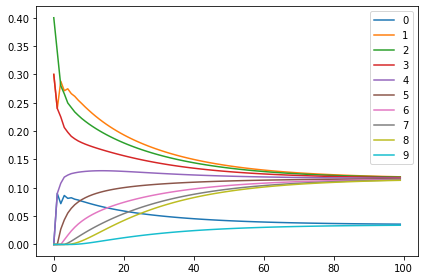

In [ ]:
simular_convergencia(S, pi, P, 100)

### Passeio Aleatório 2

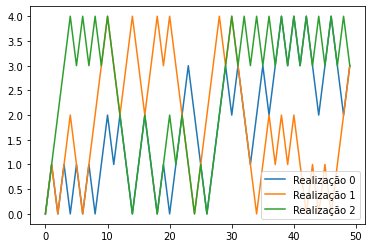

In [ ]:
def prob(i,j,ns):
  if (i == 0 and j == 1) or (i == ns -1 and j == ns -2):
    return 1
  elif  0 < i < (ns - 1) and j in (i-1, i+1):
    return 0.5
  return 0

ns = 5
m = 3
n = 50
S = [i for i in range(ns)]
pi = np.zeros(ns)
pi[np.random.randint(0,ns)] = 1

P = np.array([[prob(i,j,ns) for j in range(ns)] for i in range(ns)])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.legend()  

In [ ]:
P

array([[0. , 1. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 1. , 0. ]])

In [ ]:
mat_pot(P, 10000)

array([[0.25, 0.  , 0.5 , 0.  , 0.25],
       [0.  , 0.5 , 0.  , 0.5 , 0.  ],
       [0.25, 0.  , 0.5 , 0.  , 0.25],
       [0.  , 0.5 , 0.  , 0.5 , 0.  ],
       [0.25, 0.  , 0.5 , 0.  , 0.25]])

In [ ]:
e_regular(P, 10000)

False

In [ ]:
transicao(pi, P, 102)

array([0.25, 0.  , 0.5 , 0.  , 0.25])

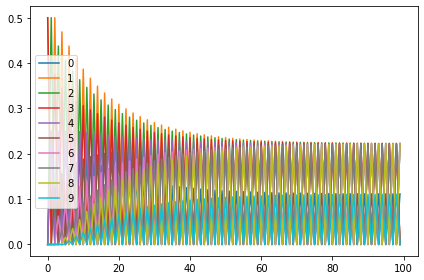

In [ ]:
simular_convergencia(S, pi, P, 100)

## Periodicidade

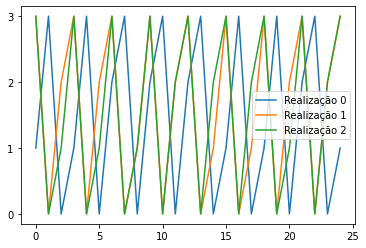

In [ ]:
m = 3
n = 25
S = (0, 1, 2, 3)
pi = np.ones(4)/4
P = np.array([
              [0, .5, .5, 0],
              [0, 0, 0, 1],
              [0, 0, 0, 1],
              [1, 0, 0, 0],
              ])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.yticks(S)
plt.legend()


In [ ]:
transicao(pi, P, 1002)

array([0.25, 0.25, 0.25, 0.25])

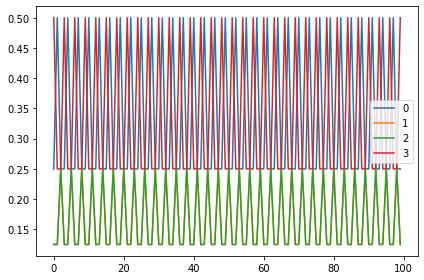

In [ ]:
simular_convergencia(S, pi, P, 100)

## Cadeias Absorventes

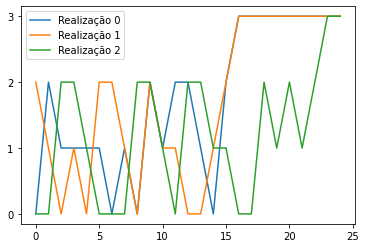

In [ ]:
m = 3
n = 25
S = (0, 1, 2, 3)
pi = np.array([.4, .3, .2, 0])
P = np.array([
              [.3, .4, .3, 0],
              [.4, .3, .3, 0],
              [0, .3, .4, .3],
              [0, 0, 0, 1],
              ])

X = simular_cadeia_markov(S, pi, P, n, m)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.yticks(S)
plt.legend()
